In [1]:
import pandas as pd
import numpy as np
import sonny_acquire
import prepare
import acquire

In [2]:
df = pd.read_csv('new_repos_dict.csv')
df['category'] = 'unknown'
df.loc[:200, 'category'] = 'gasoline'
df.loc[200:400, 'category'] = 'wind_energy'
df.loc[400:, 'category'] = 'solar_power'
df = df[['language','category','repo','readme_contents']]
df.head()

,language,category,repo,readme_contents
0,C,gasoline,N-BodyShop/gasoline,```\n \t ▄████ ▄▄▄ ██████ ▒█████ █...
1,OCaml,gasoline,michipili/gasoline,# Gasoline\n\nThe Gasoline project aims at imp...
2,TypeScript,gasoline,rvikmanis/gasoline,# Gasoline\n\nConvenient state container for R...
3,Python,gasoline,iggisv9t/benzin_gif,# benzin_gif\nCreate animated gifs that looks ...
4,Go,gasoline,daneharrigan/gasoline,# gasoline\n\n![Gasoline Dashboard](http://cl....


In [3]:
df[df.language.isna()].category.value_counts()

wind_energy    16
solar_power    15
gasoline       12
Name: category, dtype: int64

In [4]:
df = prepare.prep_repo_data(df)
df.dropna(inplace=True)
df = df.reset_index(drop=True)

In [5]:
df.head()

,language,category,repo,readme_contents,clean_tokes,clean_stemmed,clean_lemmatized
0,C,gasoline,N-BodyShop/gasoline,```\n \t ▄████ ▄▄▄ ██████ ▒█████ █...,"[&#9;, &#9;, &#9;, &#9;, &#9;, &#9;, &#9;, &#9...",&#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9; g...,&#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9; g...
1,OCaml,gasoline,michipili/gasoline,# Gasoline\n\nThe Gasoline project aims at imp...,"[gasoline, the, gasoline, project, aims, at, i...",gasolin gasolin project aim implement unixish ...,gasoline gasoline project aim implementing uni...
2,TypeScript,gasoline,rvikmanis/gasoline,# Gasoline\n\nConvenient state container for R...,"[gasoline, convenient, state, container, for, ...",gasolin conveni state contain react instal npm...,gasoline convenient state container react inst...
3,Python,gasoline,iggisv9t/benzin_gif,# benzin_gif\nCreate animated gifs that looks ...,"[benzin_gif, create, animated, gifs, that, loo...",benzin_gif creat anim gif look like gasolin pu...,benzin_gif create animated gifs look like gaso...
4,Go,gasoline,daneharrigan/gasoline,# gasoline\n\n![Gasoline Dashboard](http://cl....,"[gasoline, gasoline, dashboardhttpcllyimage3l1...",gasolin gasolin dashboardhttpcllyimage3l190u3q...,gasoline gasoline dashboardhttpcllyimage3l190u...


In [6]:
df = df[df.index!=135]
df = df[df.index!=269]

In [7]:
df.shape

(408, 7)

In [8]:
df.category.value_counts()

solar_power    151
wind_energy    135
gasoline       122
Name: category, dtype: int64

In [9]:
df['word_count'] = df.clean_lemmatized.str.split().apply(len)

In [10]:
df = df.replace('Matlab','MATLAB')

## Exploration

- What are the most common words in READMEs?
- What does the distribution of IDFs look like for the most common words?
- Does the length of the README vary by programming language?
- Do different programming languages use a different number of unique words?

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import nltk.sentiment
import re

Text(0.5, 0, 'Number of occurances')

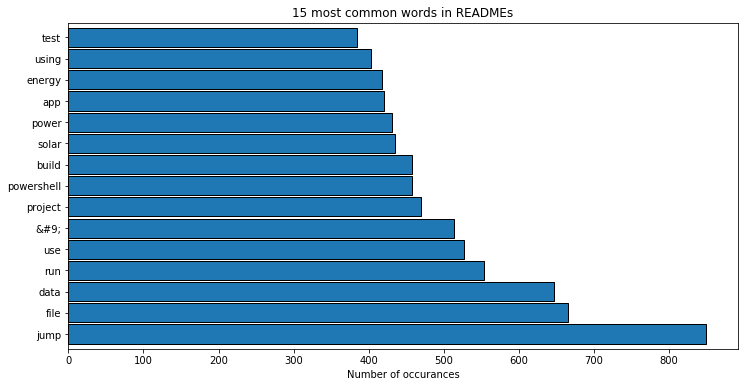

In [12]:
# What are the most common words in READMEs?
all_words = ' '.join(df.clean_lemmatized).split()
plt.figure(figsize=(12,6))
pd.Series(all_words).value_counts().head(15).plot.barh(width=.9, ec='black', title='15 most common words in READMEs')
plt.xlabel('Number of occurances')

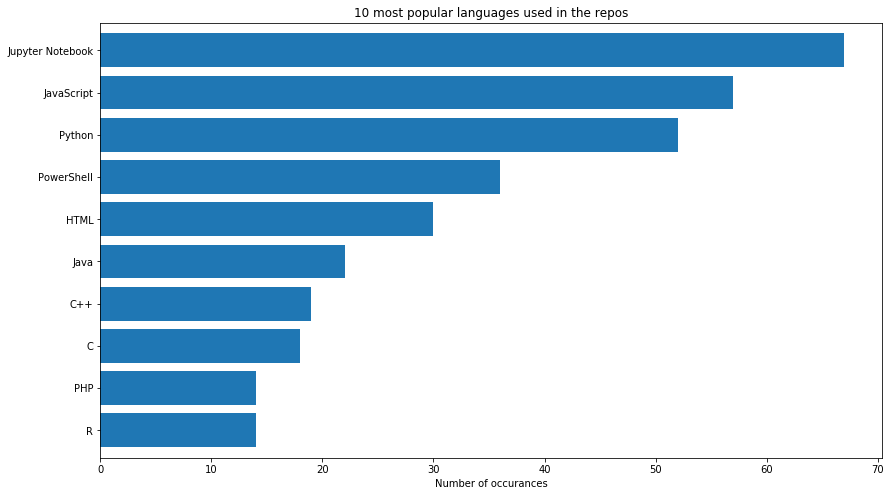

In [13]:
plt.figure(figsize=(14,8))
df.language.value_counts().sort_values(ascending=True).tail(10).plot.barh(width=.8)
plt.title('10 most popular languages used in the repos')
plt.xlabel('Number of occurances')
plt.show()

- Does the length of the README vary by programming language?

In [14]:
df.head()

,language,category,repo,readme_contents,clean_tokes,clean_stemmed,clean_lemmatized,word_count
0,C,gasoline,N-BodyShop/gasoline,```\n \t ▄████ ▄▄▄ ██████ ▒█████ █...,"[&#9;, &#9;, &#9;, &#9;, &#9;, &#9;, &#9;, &#9...",&#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9; g...,&#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9; g...,105
1,OCaml,gasoline,michipili/gasoline,# Gasoline\n\nThe Gasoline project aims at imp...,"[gasoline, the, gasoline, project, aims, at, i...",gasolin gasolin project aim implement unixish ...,gasoline gasoline project aim implementing uni...,345
2,TypeScript,gasoline,rvikmanis/gasoline,# Gasoline\n\nConvenient state container for R...,"[gasoline, convenient, state, container, for, ...",gasolin conveni state contain react instal npm...,gasoline convenient state container react inst...,27
3,Python,gasoline,iggisv9t/benzin_gif,# benzin_gif\nCreate animated gifs that looks ...,"[benzin_gif, create, animated, gifs, that, loo...",benzin_gif creat anim gif look like gasolin pu...,benzin_gif create animated gifs look like gaso...,61
4,Go,gasoline,daneharrigan/gasoline,# gasoline\n\n![Gasoline Dashboard](http://cl....,"[gasoline, gasoline, dashboardhttpcllyimage3l1...",gasolin gasolin dashboardhttpcllyimage3l190u3q...,gasoline gasoline dashboardhttpcllyimage3l190u...,244


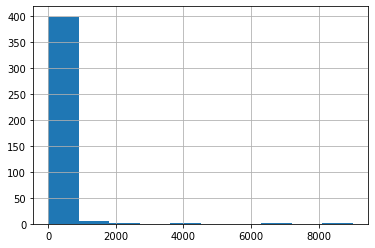

In [15]:
df.word_count.hist()

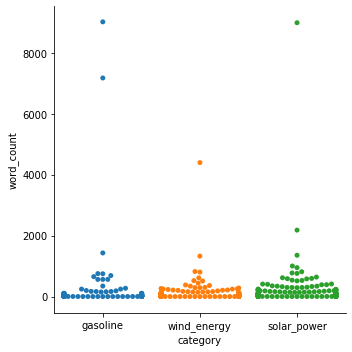

In [16]:
# swarm plot for energy category and README word counts
sns.catplot(x="category", y="word_count", kind="swarm", data=df);

In [17]:
# get top 10 popular languages
top_language = list(df.language.value_counts().head(10).index)
top_language
df[df.language.isin(top_language)].language

0                     C
3                Python
5                     C
7      Jupyter Notebook
8                Python
             ...       
403              Python
405          JavaScript
406    Jupyter Notebook
408                HTML
409                 PHP
Name: language, Length: 329, dtype: object

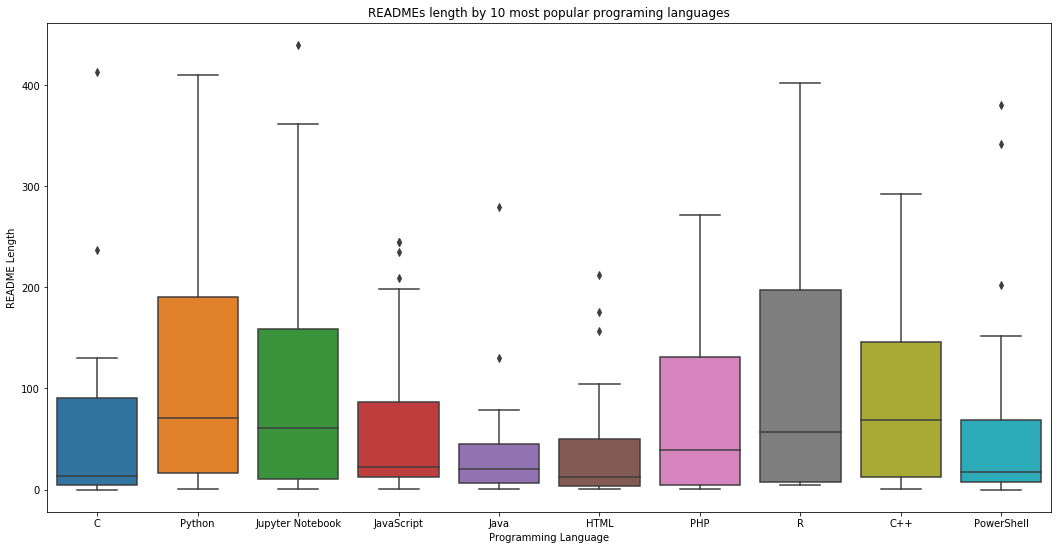

In [18]:
plt.figure(figsize=(18,9))
sns.boxplot(y=df[df.word_count < 500].word_count, x=df[df.language.isin(top_language)].language)
plt.title("READMEs length by 10 most popular programing languages")
plt.xlabel('Programming Language')
plt.ylabel('README Length')
plt.show()

## Hypothesis Testing 

### Chi Square test

In [19]:
from scipy import stats

In [20]:
df.head()

,language,category,repo,readme_contents,clean_tokes,clean_stemmed,clean_lemmatized,word_count
0,C,gasoline,N-BodyShop/gasoline,```\n \t ▄████ ▄▄▄ ██████ ▒█████ █...,"[&#9;, &#9;, &#9;, &#9;, &#9;, &#9;, &#9;, &#9...",&#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9; g...,&#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9; g...,105
1,OCaml,gasoline,michipili/gasoline,# Gasoline\n\nThe Gasoline project aims at imp...,"[gasoline, the, gasoline, project, aims, at, i...",gasolin gasolin project aim implement unixish ...,gasoline gasoline project aim implementing uni...,345
2,TypeScript,gasoline,rvikmanis/gasoline,# Gasoline\n\nConvenient state container for R...,"[gasoline, convenient, state, container, for, ...",gasolin conveni state contain react instal npm...,gasoline convenient state container react inst...,27
3,Python,gasoline,iggisv9t/benzin_gif,# benzin_gif\nCreate animated gifs that looks ...,"[benzin_gif, create, animated, gifs, that, loo...",benzin_gif creat anim gif look like gasolin pu...,benzin_gif create animated gifs look like gaso...,61
4,Go,gasoline,daneharrigan/gasoline,# gasoline\n\n![Gasoline Dashboard](http://cl....,"[gasoline, gasoline, dashboardhttpcllyimage3l1...",gasolin gasolin dashboardhttpcllyimage3l190u3q...,gasoline gasoline dashboardhttpcllyimage3l190u...,244


$H_0$:  Using a programming language and being in a energy category are independent of each other.

$H_a$:  Using a programming language and being in a energy category are dependent of each other.

In [21]:
observed = pd.crosstab(df.category, df.language)
observed

language,ActionScript,Arduino,Batchfile,C,C#,C++,CMake,CSS,Cuda,Dart,...,R,Ruby,Scala,Swift,TSQL,TeX,TypeScript,Visual Basic,Visual Basic .NET,Vue
category,,,,,,,,,,,,,,,,,,,,,
gasoline,0,0,0,6,2,1,0,2,0,2,...,7,3,0,3,0,0,5,0,1,0
solar_power,1,0,1,9,2,9,0,8,1,0,...,3,1,0,0,1,2,0,0,0,1
wind_energy,0,3,1,3,5,9,1,0,0,0,...,4,1,1,0,0,0,1,1,0,0


In [22]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p, degf, expected 
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
print('alpha = 0.01')

Observed

[[ 0  0  0  6  2  1  0  2  0  2  0  0  2 12 10 34 12  0  0  1  1  0  1  2
   7  0  0  0  1  7  7  3  0  3  0  0  5  0  1  0]
 [ 1  0  1  9  2  9  0  8  1  0  0  1  0 10  6 18 30  0  0  7  0  0  0  0
   7  1  0  0  1 31  3  1  0  0  1  2  0  0  0  1]
 [ 0  3  1  3  5  9  1  0  0  0  2  0  0  8  6  5 25  1  1  5  0  1  0  0
   0  0  1 36  0 14  4  1  1  0  0  0  1  1  0  0]]
---
Expected

[[ 0.29901961  0.89705882  0.59803922  5.38235294  2.69117647  5.68137255
   0.29901961  2.99019608  0.29901961  0.59803922  0.59803922  0.29901961
   0.59803922  8.97058824  6.57843137 17.04411765 20.03431373  0.29901961
   0.29901961  3.8872549   0.29901961  0.29901961  0.29901961  0.59803922
   4.18627451  0.29901961  0.29901961 10.76470588  0.59803922 15.54901961
   4.18627451  1.49509804  0.29901961  0.89705882  0.29901961  0.59803922
   1.79411765  0.29901961  0.29901961  0.29901961]
 [ 0.37009804  1.11029412  0.74019608  6.66176471  3.33088235  7.03186275
   0.37009804  3.70098039  0.37

In [23]:
print(f'''
Because p ({p:.4f}) < alpha (.05),  reject the null hypothesis, 
which indicates that using a programming language and being in a specific energy category are dependent of each other. 
''')


Because p (0.0000) < alpha (.05),  reject the null hypothesis, 
which indicates that using a programming language and being in a specific energy category are dependent of each other. 



## T-Test

$H_0$: There is no difference in readme length Between Python and Java.

$H_a$: There is no difference in readme length Between Python and Java.

In [24]:
x1 = df[df.language == 'Python'].word_count
x2 = df[df.language == 'CSS'].word_count

In [25]:
alpha = 0.05
tstat, p = stats.ttest_ind(x1, x2)
tstat, p 
print('tstat =', tstat)
print('p =', p)

tstat = 1.0960929213923305
p = 0.27741818093296067


In [26]:
print(f'''
Because p ({p:.4f}) > alpha (.05) , failed to reject the null hypothesis, 
which indicate that there is no statistic significant difference in readme length Between repostories
using Python and Java. 
''')


Because p (0.2774) > alpha (.05) , failed to reject the null hypothesis, 
which indicate that there is no statistic significant difference in readme length Between repostories
using Python and Java. 

